,t値,p値,標準偏回帰係数
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


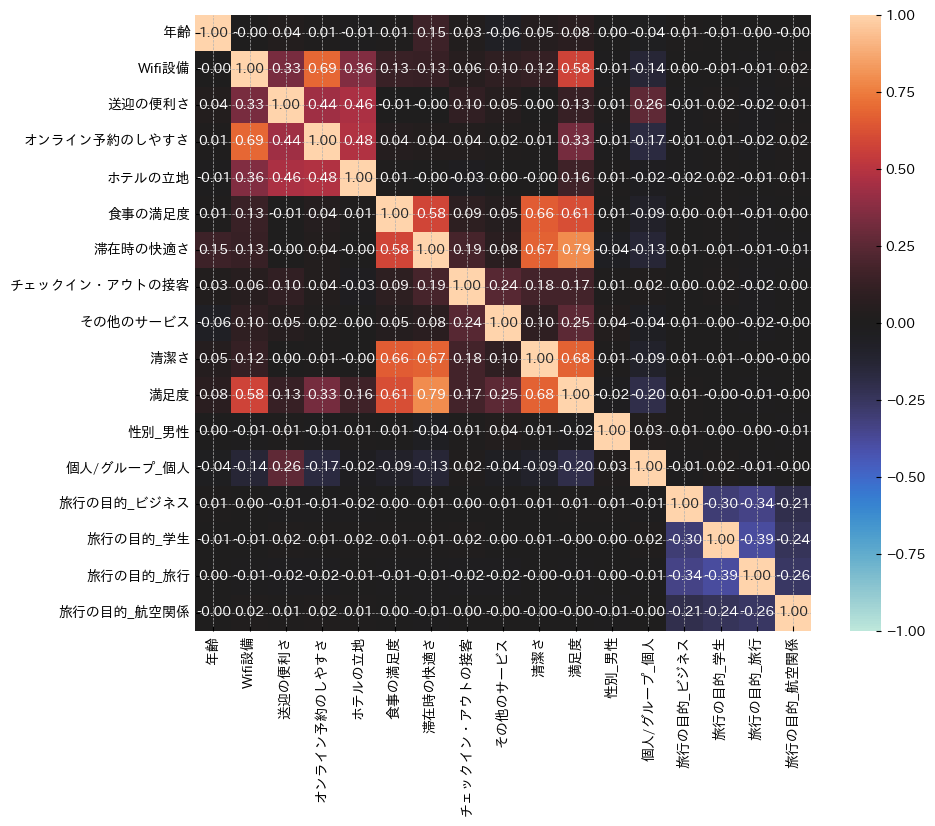

In [31]:
"""
データ分析　演習問題２

目的：回帰分析を用いて、ホテルの満足度に影響を与える要因を分析する
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

import statsmodels.api as sm

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

df = pd.read_csv('../../data/dummy_data/hotel_reviews.csv')

# とりあえずデータを見てみる
# df.info()

# カテゴリ変数をダミー変数に変換
# NOTE: drop_first=True で最初のカテゴリを削除。被りを避けれる。
_df = pd.get_dummies(df, drop_first=True)


# 相関分析

# とりあえず可視化

# 散布図
# NOTE:データ数が多いから、アホほど時間かかるんで注意👇
# sns.pairplot(_df)

# ヒートマップ
plt.figure(figsize=(10, 8)) #　👈デフォルトだと小さすぎるので大きくした
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

# 重回帰分析

# 説明変数
x = _df.drop('満足度', axis=1)
# 目的変数
y = _df['満足度']

# 標準化

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

# 特徴量（データフレーム）
feature = pd.DataFrame(x_scaled, columns=_df.drop('満足度', axis=1).columns)

# 乱数を固定
np.random.seed(0)

# モデルの作成
model = sm.OLS(y, sm.add_constant(feature))

# 分析
result = model.fit()

# 分析結果
result.summary()

# 自由度調整済み決定係数
result.rsquared_adj

# 説明変数とt値、p値、標準偏回帰係数をDFに追加（わかりやすくするために）
# NOTE: coef: coefficient: 係数(回帰係数)
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
             index=['t値', 'p値', '標準偏回帰係数'],
             ).T

# NOTE: t値が影響度を表す。
# NOTE: 一つ目の条件式：影響度が高いもを絞っている
# NOTE: 二つ目の条件式：検定的に影響度のあるものを絞っている
res_values[(res_values['t値'].abs() > 2) & (res_values['p値'] < 0.05)].sort_values('t値', ascending=False)



# 一応、相関係数も確認
# tmp = df.corr()['満足度']
# tmp[tmp.abs() > 0.5].sort_values(ascending=False)